<a href="https://colab.research.google.com/github/krystianpoczewski/SIOC--zajecia/blob/main/rotate_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rotate image by any angle using interpolation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

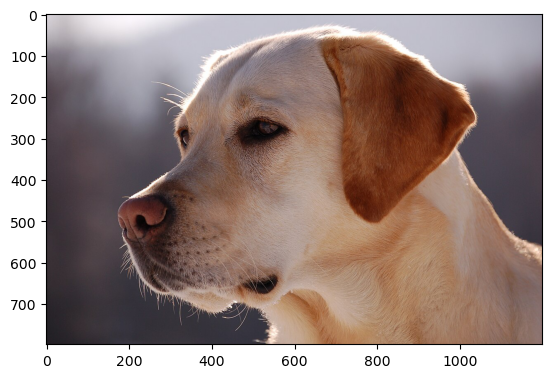

In [ ]:
img = plt.imread('dog.jpg')
plt.imshow(img)

In [ ]:
def rotate_image(img, angle):
    angle = angle % 360

    angle = np.radians(angle)
    sin = np.sin(angle)
    cos = np.cos(angle)
    new_height = int(abs(img.shape[0] * cos) + abs(img.shape[1] * sin))
    new_width = int(abs(img.shape[1] * cos) + abs(img.shape[0] * sin))

    output_img = np.zeros((new_height, new_width, img.shape[2]))

    center_w = img.shape[1] // 2
    center_h = img.shape[0] // 2

    rotation_matrix = np.array([[cos, -sin], [sin, cos]])

    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            x_from_center = col - center_w
            y_from_center = row - center_h

            rotated_x, rotated_y = np.dot(rotation_matrix, [x_from_center, y_from_center])

            new_centre_w = new_width // 2
            new_centre_h = new_height // 2

            rotated_x = int(new_centre_w + rotated_x)
            rotated_y = int(new_centre_h + rotated_y)

            if 0 <= rotated_x < new_width and 0 <= rotated_y < new_height:
                output_img[rotated_y, rotated_x, :] = img[row, col, :]

    return np.clip(output_img, 0, 255).astype(np.uint8)

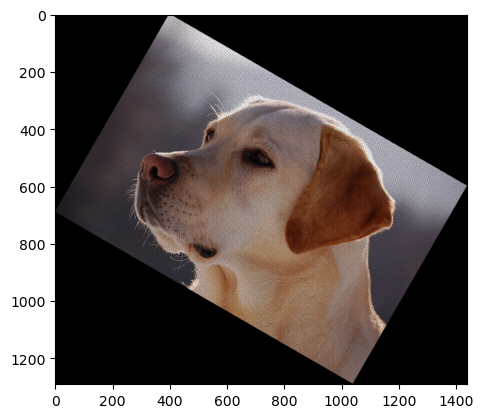

In [ ]:
rotated_img = rotate_image(img, 30)
plt.imshow(rotated_img)

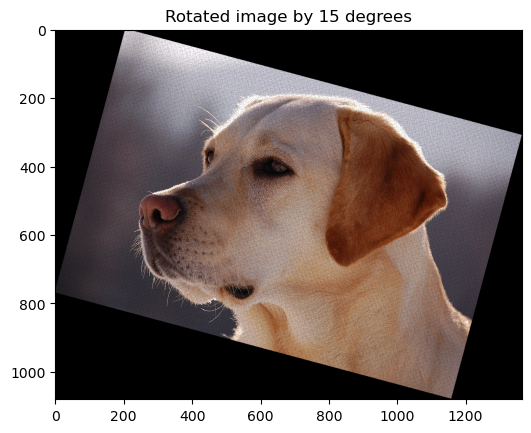

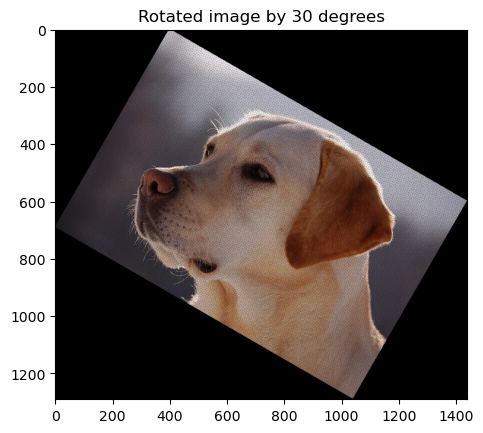

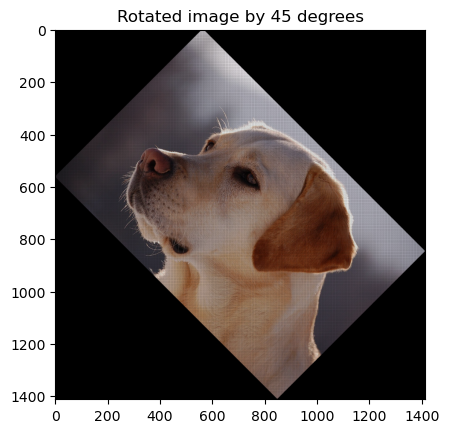

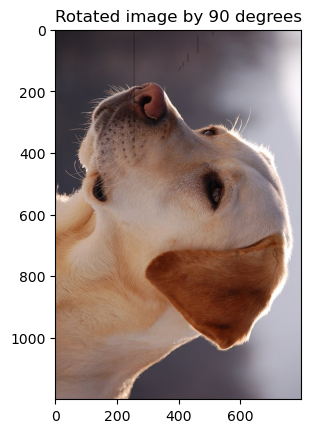

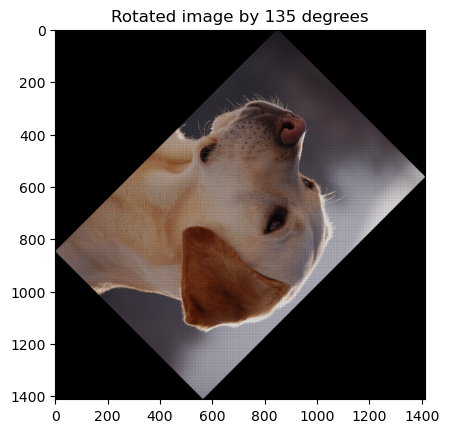

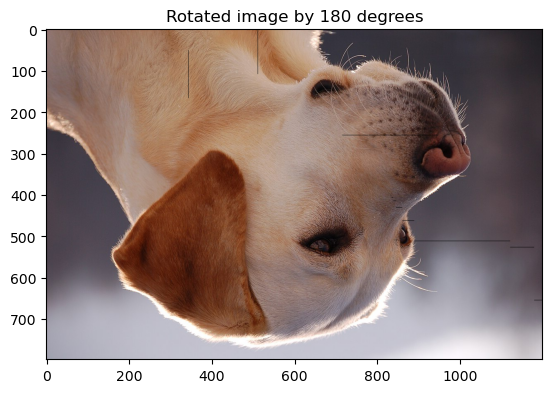

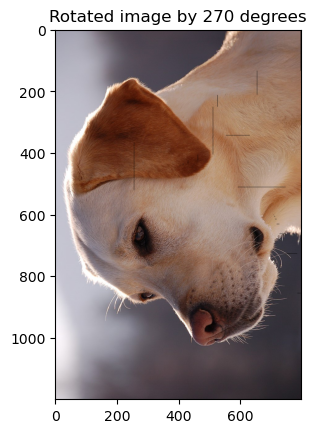

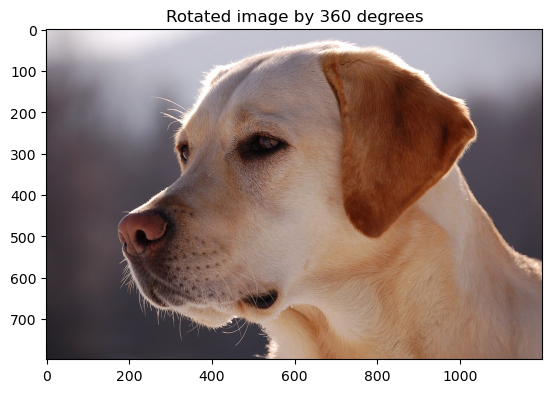

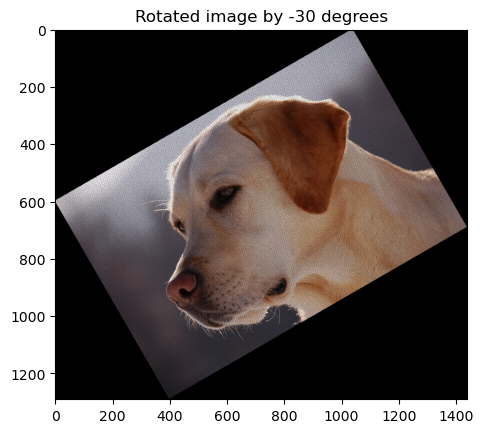

In [ ]:
rotation_values = [15, 30, 45, 90, 135, 180, 270, 360, -30]
for value in rotation_values:
    rotated_img = rotate_image(img, value)
    plt.imshow(rotated_img)
    plt.title(f'Rotated image by {value} degrees')
    plt.show()

Program oblicza wartości nowego punktu po obróceniu obrazu, a następnie wykorzystuję interpolacji metodą najbliższego sąsiada do nałożenia wartości na piksel. Jak widać na przykładach powyżej program poprawnie wykonuje obracanie obrazu.